In [11]:
import pandas as pd

#Explore and prepare Data

In [12]:
df=pd.read_csv("final_data.csv")
df.head()

,YearsWithCurrManager,EducationField,Age,YearsSinceLastPromotion,TotalWorkingYears,YearsAtCompany,MaritalStatus,StockOptionLevel,MonthlyIncome,JobSatisfaction,...,DistanceFromHome,JobRole,DailyRate,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,NumCompaniesWorked,JobLevel,Attrition,WorkLifeBalance
0,0.245834,-0.937414,0.446350,-0.679146,-0.421642,-0.164613,1.236820,-0.932014,-0.108350,1.153254,...,-1.010909,1.032716,0.742527,-2.171982,-0.660531,-0.063296,2.125136,-0.057788,1,-2.493820
1,0.806541,-0.937414,1.322365,-0.368715,-0.164511,0.488508,-0.133282,0.241988,-0.291719,-0.660853,...,-0.147150,0.626374,-1.297775,0.155707,0.254625,0.764998,-0.678049,-0.057788,0,0.338096
2,-1.155935,1.316673,0.008343,-0.679146,-0.550208,-1.144294,1.236820,-0.932014,-0.937654,0.246200,...,-0.887515,-0.998992,1.414363,0.155707,1.169781,-1.167687,1.324226,-0.961486,1,0.338096
3,-1.155935,-0.937414,-0.429664,0.252146,-0.421642,0.161947,-0.133282,-0.932014,-0.763634,0.246200,...,-0.764121,0.626374,1.461466,0.155707,1.169781,0.764998,-0.678049,-0.961486,0,0.338096
4,-0.595227,0.565311,-1.086676,-0.058285,-0.678774,-0.817734,-0.133282,0.241988,-0.644858,-0.660853,...,-0.887515,-0.998992,-0.524295,0.155707,-1.575686,-0.615492,2.525591,-0.961486,0,0.338096


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearsWithCurrManager     1470 non-null   float64
 1   EducationField           1470 non-null   float64
 2   Age                      1470 non-null   float64
 3   YearsSinceLastPromotion  1470 non-null   float64
 4   TotalWorkingYears        1470 non-null   float64
 5   YearsAtCompany           1470 non-null   float64
 6   MaritalStatus            1470 non-null   float64
 7   StockOptionLevel         1470 non-null   float64
 8   MonthlyIncome            1470 non-null   float64
 9   JobSatisfaction          1470 non-null   float64
 10  JobInvolvement           1470 non-null   float64
 11  OverTime                 1470 non-null   float64
 12  DistanceFromHome         1470 non-null   float64
 13  JobRole                  1470 non-null   float64
 14  DailyRate               

In [14]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Attrition')
y=df['Attrition']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=8)

#1. XGBoost Classifier

# Pipeline of training

In [ ]:
!pip install category_encoders

In [16]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
estimators=[('encoder',TargetEncoder()),('clf',XGBClassifier(random_state=8))]
pipe=Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

# Hyperparameter tuning

In [ ]:
!pip install scikit-optimize

In [18]:
from skopt import BayesSearchCV
from skopt.space import Real,Categorical,Integer
search_space={
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001,1.0,prior='log-uniform'),
    'clf__subsample':Real(0.5,1.0),
    'clf__colsample_bytree':Real(0.5,1.0),
    'clf__colsample_bylevel':Real(0.5,1.0),
    'clf__colsample_bynode':Real(0.5,1.0),
    'clf__reg_alpha':Real(0.0,10.0),
    'clf__reg_lambda':Real(0.0,10.0),
    'clf__gamma':Real(0.0,10.0),
}


opt=BayesSearchCV(pipe,search_space,cv=3,n_iter=30,scoring='roc_auc',random_state=8)

# Train XGBoost model

In [19]:
y_train.shape

(1176,)

# Model Evaluating And Making Predictions

In [ ]:
opt.fit(x_train,y_train)

In [21]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=[])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.6404101070114374,
                               colsample_bynode=1.0,
                               colsample_bytree=0.9710813321313715, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1.0,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [22]:
opt.best_score_

0.8259110981106103

In [23]:
opt.score(x_test,y_test)

0.7887845637005771

In [24]:
opt.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
opt.predict_proba(x_test)

In [26]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=[])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.6404101070114374, colsample_bynode=1.0,
                colsample_bytree=0.9710813321313715, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.0, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=1.0, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, random_state=8, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

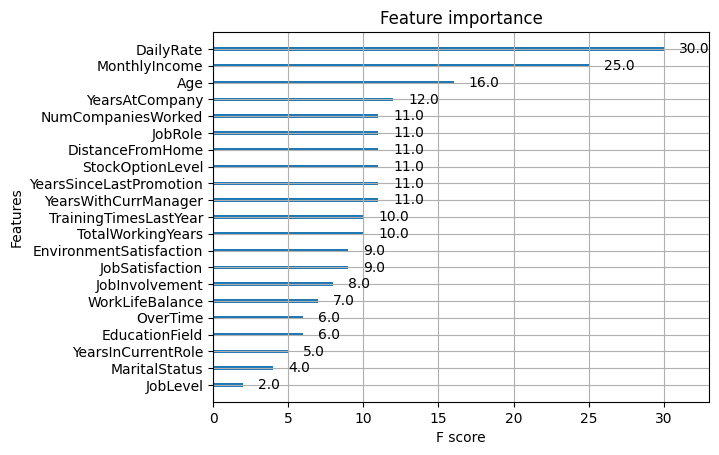

In [27]:
from xgboost import plot_importance
xgboost_step=opt.best_estimator_.steps[1]
xgboost_model=xgboost_step[1]
plot_importance(xgboost_model)

In [28]:
from sklearn.metrics import accuracy_score
y_pred = opt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8707482993197279

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.68      0.36      0.47        47

    accuracy                           0.87       294
   macro avg       0.78      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294

